In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import f1_score, r2_score, mean_squared_error

In [2]:
houses = pd.read_csv('HTrainW19Final.csv')

In [3]:
houses.head()

,Ob,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,50,RL,82.0,12375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,131878.1028
1,2,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,104069.2909
2,3,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,116843.6504
3,4,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,132932.2089
4,5,60,FV,100.0,13162,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,429077.4306


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 81 columns):
Ob               2500 non-null int64
MSSubClass       2500 non-null int64
MSZoning         2496 non-null object
LotFrontage      2106 non-null float64
LotArea          2500 non-null int64
Street           2500 non-null object
Alley            177 non-null object
LotShape         2500 non-null object
LandContour      2500 non-null object
Utilities        2498 non-null object
LotConfig        2500 non-null object
LandSlope        2500 non-null object
Neighborhood     2500 non-null object
Condition1       2500 non-null object
Condition2       2500 non-null object
BldgType         2500 non-null object
HouseStyle       2500 non-null object
OverallQual      2500 non-null int64
OverallCond      2500 non-null int64
YearBuilt        2500 non-null int64
YearRemodAdd     2500 non-null int64
RoofStyle        2500 non-null object
RoofMatl         2500 non-null object
Exterior1st      2500 non-

In [5]:
houses.SalePrice.describe()

count      2500.000000
mean     184841.984463
std       78266.877713
min       33838.487790
25%      132305.725600
50%      166988.283900
75%      218735.840475
max      759112.593300
Name: SalePrice, dtype: float64

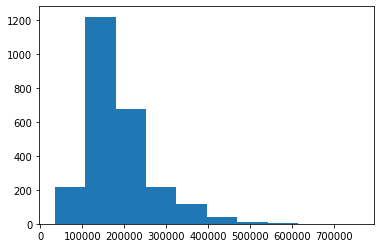

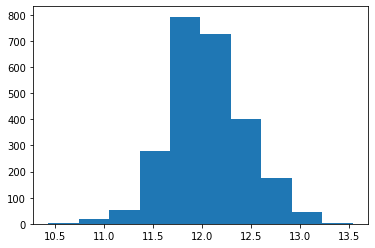

In [6]:
plt.hist(houses.SalePrice)
plt.show()
plt.hist(np.log(houses.SalePrice))
plt.show()
# we can see that the sale price is skewed. After the log-transformation, we can see the it looks like normal distribution

In [7]:
log_sale_price = pd.concat({'SalePriceLog':np.log(houses.SalePrice)}, axis=1)
houses = houses.join(log_sale_price)

In [8]:
houses.head()

,Ob,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
0,1,50,RL,82.0,12375,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,6,2006,WD,Normal,131878.1028,11.789633
1,2,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Shed,450,8,2007,WD,Normal,104069.2909,11.552812
2,3,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Normal,116843.6504,11.668592
3,4,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,132932.2089,11.797595
4,5,60,FV,100.0,13162,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,New,Partial,429077.4306,12.969393


Exploration of individual variables

In [9]:
## comparing which categorical variables we want to choose
## we look all the categorical values one by one to see which effect the price most.
## here are all the categorical values: MSZoning, LotShape,LandContour, SaleType,SaleCondition, Neighborhood,KitchenQual

In [10]:
from statsmodels.formula.api import ols
# KitchenQual
model = ols('SalePriceLog ~ C(KitchenQual)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     689.2
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:49:25   Log-Likelihood:                -449.17
No. Observations:                2499   AIC:                             906.3
Df Residuals:                    2495   BIC:                             929.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.6748      0.021    602.764      0.000      12.634      12.716
C(KitchenQual)[T.Fa]    -1.1078      0.042    -26.598      0.000      -1.189      -1.026
C(KitchenQual)[T.Gd]    -0.4490      0.023    -19.540      0.000      -0.494      -0.404
C(KitchenQual)[T.TA]    -0.8316      0.023    -36.878      0.000      -0.876      -0.787
==============================================================================
Omnibus:                      136.974   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.774
Skew:                          -0.346   Prob(JB):                     4.00e-67
Kurtosis:                       4.568   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# LotShape
model = ols('SalePriceLog ~ C(LotShape)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     92.76
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.48e-57
Time:                        21:49:26   Log-Likelihood:                -1072.2
No. Observations:                2500   AIC:                             2152.
Df Residuals:                    2496   BIC:                             2176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.2055      0.013    919.069      0.000      12.179      12.232
C(LotShape)[T.IR2]     0.1268      0.049      2.605      0.009       0.031       0.222
C(LotShape)[T.IR3]     0.1361      0.097      1.404      0.160      -0.054       0.326
C(LotShape)[T.Reg]    -0.2454      0.016    -15.194      0.000      -0.277      -0.214
==============================================================================
Omnibus:                       49.118   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.279
Skew:                           0.186   Prob(JB):                     1.66e-17
Kurtosis:                       3.777   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# MSZoning
model = ols('SalePriceLog ~ C(MSZoning)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     109.8
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.67e-86
Time:                        21:49:26   Log-Likelihood:                -995.10
No. Observations:                2496   AIC:                             2000.
Df Residuals:                    2491   BIC:                             2029.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.4249      0.079    145.085      0.000      11.271      11.579
C(MSZoning)[T.FV]     0.8238      0.086      9.586      0.000       0.655       0.992
C(MSZoning)[T.RH]     0.3628      0.113      3.218      0.001       0.142       0.584
C(MSZoning)[T.RL]     0.6849      0.079      8.651      0.000       0.530       0.840
C(MSZoning)[T.RM]     0.3238      0.081      4.008      0.000       0.165       0.482
==============================================================================
Omnibus:                       45.608   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.811
Skew:                           0.217   Prob(JB):                     2.29e-14
Kurtosis:                       3.644   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# LandContour
model = ols('SalePriceLog ~ C(LandContour)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     41.06
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.73e-26
Time:                        21:49:26   Log-Likelihood:                -1144.1
No. Observations:                2500   AIC:                             2296.
Df Residuals:                    2496   BIC:                             2319.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.7992      0.038    312.905      0.000      11.725      11.873
C(LandContour)[T.HLS]     0.5778      0.053     10.912      0.000       0.474       0.682
C(LandContour)[T.Low]     0.3032      0.066      4.627      0.000       0.175       0.432
C(LandContour)[T.Lvl]     0.2443      0.039      6.336      0.000       0.169       0.320
==============================================================================
Omnibus:                       24.584   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.508
Skew:                           0.083   Prob(JB):                     1.18e-08
Kurtosis:                       3.568   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# SaleType
model = ols('SalePriceLog ~ C(SaleType) ', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     43.19
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           3.23e-65
Time:                        21:49:26   Log-Likelihood:                -1041.7
No. Observations:                2499   AIC:                             2101.
Df Residuals:                    2490   BIC:                             2154.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.8263      0.039    303.358      0.000      11.750      11.903
C(SaleType)[T.CWD]       0.1260      0.169      0.745      0.456      -0.205       0.457
C(SaleType)[T.Con]       0.2262      0.144      1.567      0.117      -0.057       0.509
C(SaleType)[T.ConLD]    -0.0710      0.082     -0.866      0.386      -0.232       0.090
C(SaleType)[T.ConLI]     0.1011      0.113      0.894      0.372      -0.121       0.323
C(SaleType)[T.ConLw]    -0.3577      0.169     -2.116      0.034      -0.689      -0.026
C(SaleType)[T.New]       0.6599      0.047     14.003      0.000       0.567       0.752
C(SaleType)[T.Oth]       0.1199      0.216      0.555      0.579      -0.303       0.543
C(SaleType)[T.WD]        0.1986      0.040      4.992      0.000       0.121       0.277
==============================================================================
Omnibus:                       26.551   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.205
Skew:                           0.122   Prob(JB):                     8.34e-09
Kurtosis:                       3.545   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# SaleCondition
model = ols('SalePriceLog ~ C(SaleCondition)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     76.25
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.48e-74
Time:                        21:49:26   Log-Likelihood:                -1026.5
No. Observations:                2500   AIC:                             2065.
Df Residuals:                    2494   BIC:                             2100.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      11.7926      0.029    410.925      0.000      11.736      11.849
C(SaleCondition)[T.AdjLand]    -0.1218      0.109     -1.114      0.265      -0.336       0.093
C(SaleCondition)[T.Alloca]      0.1898      0.087      2.192      0.028       0.020       0.360
C(SaleCondition)[T.Family]      0.0772      0.063      1.232      0.218      -0.046       0.200
C(SaleCondition)[T.Normal]      0.2418      0.030      8.114      0.000       0.183       0.300
C(SaleCondition)[T.Partial]     0.6885      0.039     17.751      0.000       0.612       0.765
==============================================================================
Omnibus:                       24.051   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.250
Skew:                           0.113   Prob(JB):                     6.02e-08
Kurtosis:                       3.518   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Neighborhood
model = ols('SalePriceLog ~ C(Neighborhood)', data=houses)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     140.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:49:26   Log-Likelihood:                -129.22
No. Observations:                2500   AIC:                             308.4
Df Residuals:                    2475   BIC:                             454.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     12.3105      0.051    240.355      0.000      12.210      12.411
C(Neighborhood)[T.Blueste]    -0.3256      0.100     -3.270      0.001      -0.521      -0.130
C(Neighborhood)[T.BrDale]     -0.6996      0.072     -9.753      0.000      -0.840      -0.559
C(Neighborhood)[T.BrkSide]    -0.6016      0.057    -10.485      0.000      -0.714      -0.489
C(Neighborhood)[T.ClearCr]    -0.0964      0.066     -1.454      0.146      -0.226       0.034
C(Neighborhood)[T.CollgCr]    -0.1259      0.054     -2.332      0.020      -0.232      -0.020
C(Neighborhood)[T.Crawfor]    -0.1163      0.059     -1.976      0.048      -0.232      -0.001
C(Neighborhood)[T.Edwards]    -0.5757      0.054    -10.574      0.000      -0.683      -0.469
C(Neighborhood)[T.Gilbert]    -0.1296      0.056     -2.325      0.020      -0.239      -0.020
C(Neighborhood)[T.IDOTRR]     -0.7386      0.059    -12.588      0.000      -0.854      -0.624
C(Neighborhood)[T.MeadowV]    -0.7260      0.066    -11.009      0.000      -0.855      -0.597
C(Neighborhood)[T.Mitchel]    -0.2907      0.058     -4.983      0.000      -0.405      -0.176
C(Neighborhood)[T.NAmes]      -0.4131      0.053     -7.799      0.000      -0.517      -0.309
C(Neighborhood)[T.NPkVill]    -0.3774      0.090     -4.196      0.000      -0.554      -0.201
C(Neighborhood)[T.NWAmes]     -0.1532      0.056     -2.728      0.006      -0.263      -0.043
C(Neighborhood)[T.NoRidge]     0.3377      0.061      5.512      0.000       0.218       0.458
C(Neighborhood)[T.NridgHt]     0.3057      0.055      5.539      0.000       0.197       0.414
C(Neighborhood)[T.OldTown]    -0.5799      0.054    -10.655      0.000      -0.687      -0.473
C(Neighborhood)[T.SWISU]      -0.4592      0.063     -7.270      0.000      -0.583      -0.335
C(Neighborhood)[T.Sawyer]     -0.4747      0.056     -8.493      0.000      -0.584      -0.365
C(Neighborhood)[T.SawyerW]    -0.1734      0.057     -3.063      0.002      -0.284      -0.062
C(Neighborhood)[T.Somerst]     0.0046      0.055      0.083      0.934      -0.104       0.113
C(Neighborhood)[T.StoneBr]     0.3528      0.064      5.477      0.000       0.226       0.479
C(Neighborhood)[T.Timber]      0.1375      0.060      2.291      0.022       0.020       0.255
C(Neighborhood)[T.Veenker]     0.0642      0.076      0.847      0.397      -0.084       0.213
==============================================================================
Omnibus:                       94.685   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.466
Skew:                          -0.004   Prob(JB):                     1.25e-61
Kurtosis:                       4.641   Cond. No.                         52.2
============================

In [17]:
## We can see from above, we can see that Neighborhood and KitchenQual affect the price a lot, much important than others. 
## they have high r^2
## So we choose to use these two categorical variables.

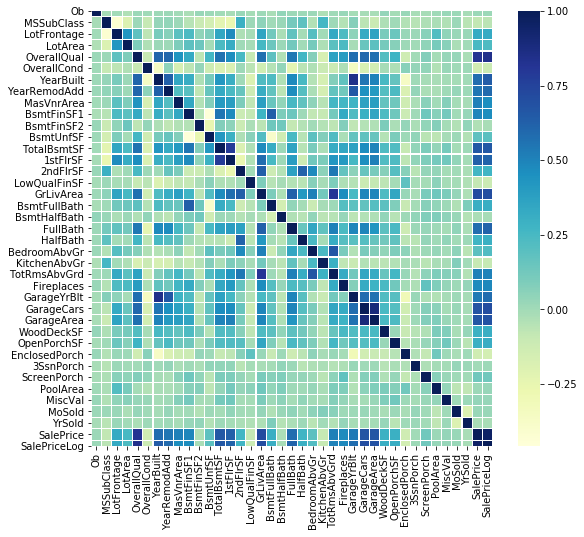

In [18]:
# Now we look at the whole dataset variables
import seaborn as sns 

from scipy.stats import norm 
#Exploring Correlation ONLY FOR int64 variables
houses['SalePrice'].describe()
corrmat = houses.corr()
f,ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat, ax=ax, cmap ="YlGnBu",linewidths = 0.1)

#From this plot, we can choose the variables that have highly positive linear relationship
#with SalePrice. Numerical:#"OverallQual", "YearRemodAdd", "YearBuilt", 
#"BsmtFinSF1", "TotalBsmtSF", "GrLivArea", "FullBath", 
#"TotRmsAbvGrd","GarageYrBlt", "GarageCars",
#And some variables are highly correlated with other variables, so we drop those variables later in model.

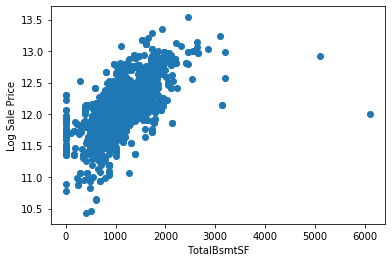

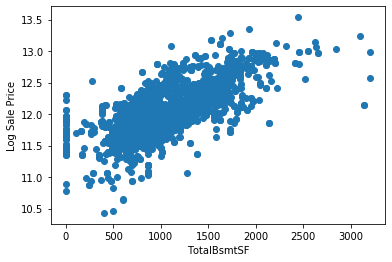

In [19]:
# Remove outliers in TotalBsmtSF
plt.scatter(x=houses.TotalBsmtSF, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()
houses = houses[houses.TotalBsmtSF < 4000]
plt.scatter(x=houses.TotalBsmtSF, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()

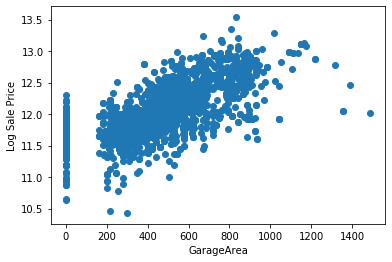

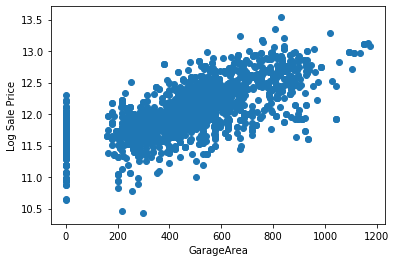

In [20]:
# Remove outliers in GarageArea
plt.scatter(x=houses.GarageArea, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('GarageArea')
plt.show()
houses = houses[houses.GarageArea < 1200]
plt.scatter(x=houses.GarageArea, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('GarageArea')
plt.show()

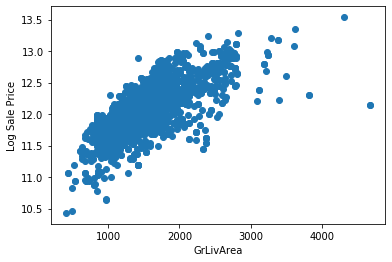

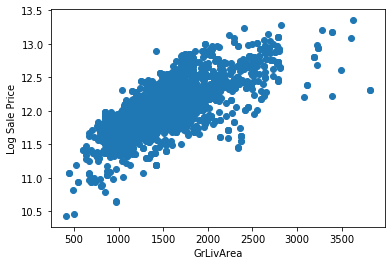

In [21]:
# Remove outliers in GrLivArea
plt.scatter(x=houses.GrLivArea, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('GrLivArea')
plt.show()
houses = houses[houses.GrLivArea < 4000]
plt.scatter(x=houses.GrLivArea, y=houses.SalePriceLog)
plt.ylabel('Log Sale Price')
plt.xlabel('GrLivArea')
plt.show()

Exploration of Relationships between variables

In [22]:
#Potential relationships:
#a) categorical data: two-way tables and side-by-side bar charts for relationships
# catagorical variable: MSZoning, LotShape,LandContour, SaleType,SaleCondition, Neighborhood,KitchenQual


#two way tables
# Neighborhood plays an important role in deciding housing price. 
# Therefore we will investigate the relationship between neighborhood and other variables

import pandas as pd

Kitch_v_neighb = pd.crosstab(index=houses["Neighborhood"],  # Make a crosstab
                        columns=houses["KitchenQual"],margins=True)             

Kitch_v_neighb

# From the two way table we can see that the most abundant kitchen quality is graded as the average. The rarest are graded fair.
# Also, we can see that neighborhood NridgHt has the most number of Excellent kitchen quality
# Neighborhood NAmes has the most number of average kitchen quality
# Based on this relationship, it is reasonable to deduct that NridgHt has the highest housing price, as the kitchen quality has a positive correlation with housing price. 




KitchenQual,Ex,Fa,Gd,TA,All
Neighborhood,,,,,
Blmngtn,3,0,22,0,25
Blueste,0,0,4,5,9
BrDale,0,0,1,25,26
BrkSide,1,16,12,68,97
ClearCr,0,0,15,21,36
CollgCr,5,0,174,45,224
Crawfor,6,7,27,38,78
Edwards,4,12,38,134,188
Gilbert,2,0,79,54,135


In [23]:
#side-by-side bar charts
# we will use time as x-axis, SalePrice as y-axis, and street as bars
houses.YrSold.unique()
#houses.groupby(['YrSold', 'Neighborhood'])["SalePrice"].mean()
houses.groupby( 'Neighborhood')["SalePrice"].mean()

Neighborhood
Blmngtn    224769.038492
Blueste    164467.162433
BrDale     111262.270662
BrkSide    125991.406202
ClearCr    207458.400359
CollgCr    201323.155613
Crawfor    207106.363585
Edwards    128743.261555
Gilbert    198295.058193
IDOTRR     111560.438084
MeadowV    108733.079046
Mitchel    169820.771660
NAmes      150239.983532
NPkVill    152674.834625
NWAmes     192808.968243
NoRidge    314270.656665
NridgHt    313302.895560
OldTown    131259.699285
SWISU      144333.161298
Sawyer     140438.567083
SawyerW    194854.850277
Somerst    231042.285871
StoneBr    330091.601744
Timber     264681.784470
Veenker    242843.602548
Name: SalePrice, dtype: float64

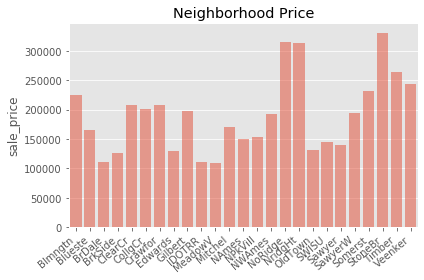

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

plt.style.use('ggplot')
n = 25
mean_price= [224769.038492, 164467.162433, 111262.270662, 125991.406202, 207458.400359, 201323.155613, 207106.363585,128743.261555,198295.058193,111560.438084,108733.079046,169820.771660,150239.983532,152674.834625,192808.968243,314270.656665, 313302.895560,131259.699285,144333.161298,140438.567083,194854.850277,231042.285871,330091.601744,264681.784470,242843.602548]
names = ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']
ds = pd.Series({"Column" : names})
y_pos = np.arange(len(names))

plt.bar(y_pos, mean_price, align = "center", alpha = 0.5)
plt.xticks(y_pos, names)

plt.title('Neighborhood Price')

ax = sns.countplot(x="Column", data=ds)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel('sale_price')

rcParams['figure.figsize'] = 15, 6

plt.show()

# According to the graph, we can see that neiborhood StongBr has the highest mean sales price.
# NoRidge and Nridght have very similar average sale price
# The lowest sale price happen in BrDale and MeadowV

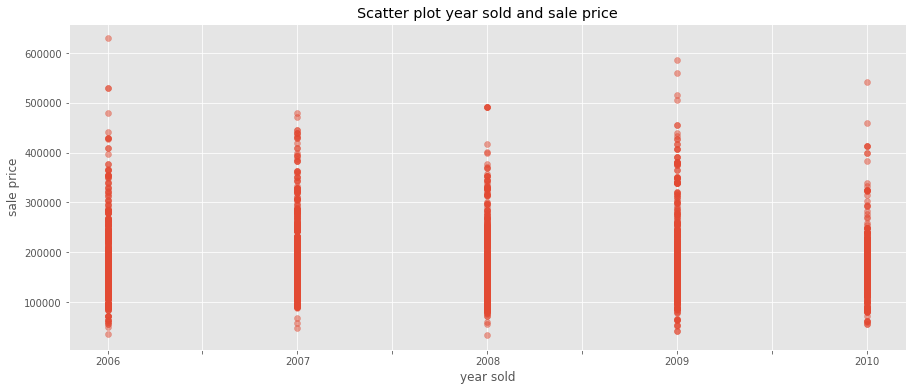

In [25]:
#b) numeric data: scatter plots for relationships
houses
# lets check scatterplot between saleprice and YrSold

import numpy as np
import matplotlib.pyplot as plt

# Create data and plot                        
x = houses.YrSold
y = houses.SalePrice

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot year sold and sale price')
plt.xlabel('year sold')
plt.ylabel('sale price')
plt.xticks([2006.0, 2006.5, 2007.0,2007.5, 2008.0,2008.5, 2009.0,2009.5, 2010.0], ['2006', '', '2007', '','2008', '','2009', '','2010'])

plt.show()
# We can see that as the year progresses, houses's price does not increase
# The price range is relatively concentrated between 500000 and 50000
# The prices also do not fluctuate through the years
# The prices in 2007 are most clustered, with relatively less obvious outliers


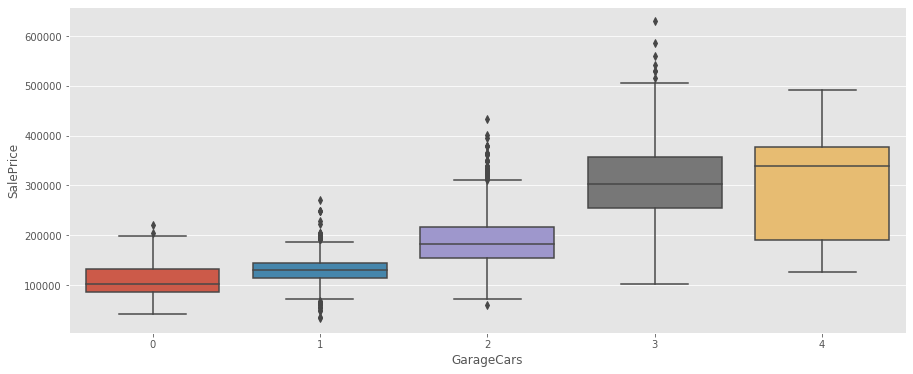

In [26]:
#c) numeric and categorical: side-by-side histograms or boxplots for relationships
#Findings reported with readable tables or clearly labeled graphs
import seaborn as sns
sns.boxplot(x="GarageCars", y="SalePrice", data=houses)


# From the side-by-side boxplot, it is obvious that the houses with more garage space would ranging higher
# However, we can see that the highest sale price comes from houses with three car garages, not four
# Also, the inter quantile range is wider for three car garages.

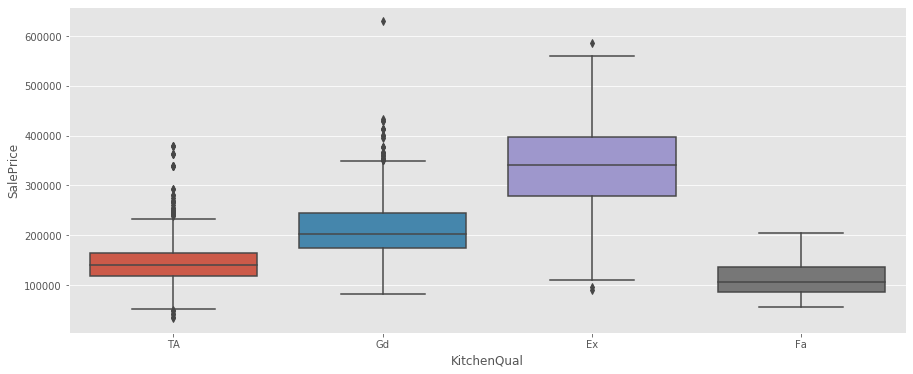

In [27]:
sns.boxplot(x="KitchenQual", y="SalePrice", data=houses)


# From the side-by-side boxplot, it is obvious that the houses with better kitchen quality would ranging higher
# The houses with high sale price have excelent kitchen quality
# However, we notice that there is one house with the highest sale price that has only good kitchen quality


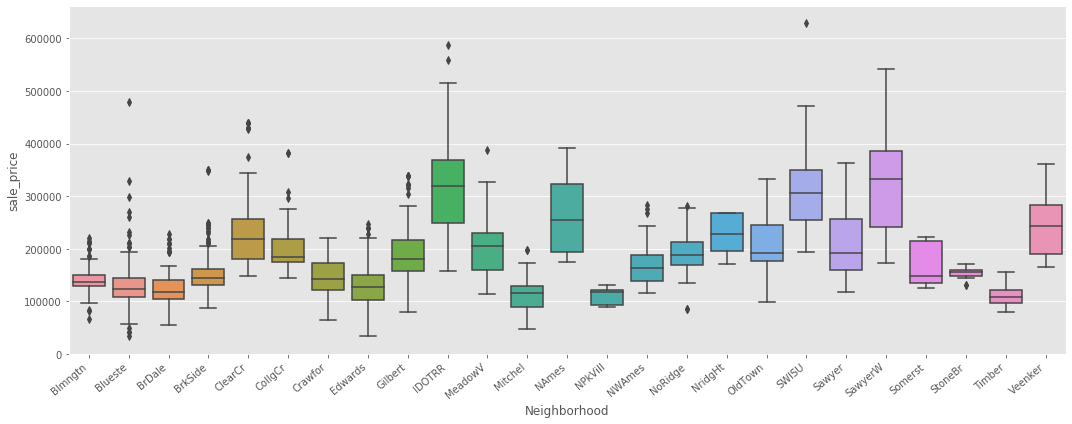

In [28]:
sns.boxplot(x="Neighborhood", y="SalePrice", data=houses)

ax = sns.countplot(x="Column", data=ds)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel('sale_price')

rcParams['figure.figsize'] = 15, 6

plt.show()
# From the side-by-side boxplot, it is obvious that the houses in Idotrr and SawyerW have higher and wider price range
# The houses in StoneBr have prices that are very concentrated. 
# lets check the number of houses in each region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

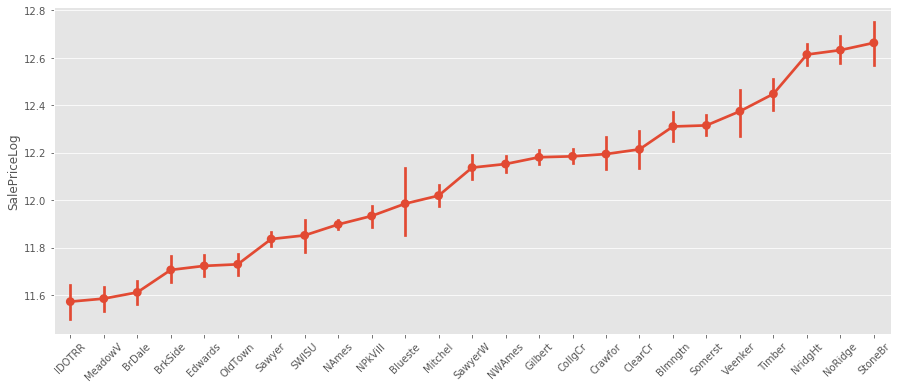

In [29]:
neighborhood_meanSP = houses.groupby('Neighborhood')['SalePriceLog'].mean()
neighborhood_meanSP = neighborhood_meanSP.sort_values()
sns.pointplot(x = houses.Neighborhood.values, y=houses.SalePriceLog, order = neighborhood_meanSP.index)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

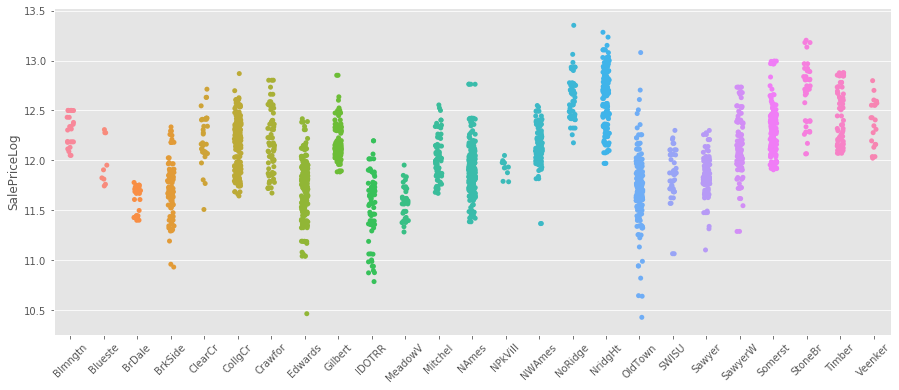

In [30]:
import seaborn as sns

sns.stripplot(x = houses.Neighborhood.values, y = houses.SalePriceLog,
              order = np.sort(houses.Neighborhood.unique()), 
              jitter = 0.1, alpha = 1)
plt.xticks(rotation = 45)

In [31]:
from collections import Counter

Counter(houses.Neighborhood)
# we can see that stoneBr, Idotrr, and Sawyerw all have sufficient amount of sample to statistical reasoning.

Counter({'Sawyer': 131,
         'OldTown': 193,
         'BrkSide': 97,
         'NAmes': 358,
         'Somerst': 150,
         'Gilbert': 135,
         'SWISU': 48,
         'Edwards': 188,
         'SawyerW': 113,
         'NridgHt': 152,
         'CollgCr': 224,
         'IDOTRR': 80,
         'Timber': 67,
         'BrDale': 26,
         'Mitchel': 82,
         'NWAmes': 123,
         'Blmngtn': 25,
         'ClearCr': 37,
         'NoRidge': 57,
         'Crawfor': 78,
         'StoneBr': 43,
         'Blueste': 9,
         'NPkVill': 12,
         'MeadowV': 38,
         'Veenker': 21})

In [32]:
###### moldel#############Select KitchenQual == "Ex", considering areas
houseEX = houses[houses.KitchenQual == "Ex"]
#houseEX.info()

In [33]:
dummyCols=pd.get_dummies(houseEX["Neighborhood"])
houseEX=houseEX.join(dummyCols)

In [34]:
# from above we see we have 182 rows, we sperate them half and half
# below is the training part
houseEX1 = houseEX[1:91]

#Blmngtn / CollgCr / Edwards / StoneBr

# our predictors
X = houseEX1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd",
              "GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr","Blmngtn","CollgCr","Edwards","StoneBr"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseEX1["SalePriceLog"]


# test 
X1 = houseEX[92:182]
X1 = X1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd",
              "GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr","Blmngtn","CollgCr","Edwards","StoneBr"]]
# fit model lm
model = sm.OLS(y, X).fit()
predictions = model.predict(X1) # make the predictions by the model


# fit model stats model ordinary least squares
print(model.summary())

## mse

# below is the testing price part
test = houseEX[92:182].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     78.66
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           4.24e-38
Time:                        21:49:32   Log-Likelihood:                 91.914
No. Observations:                  90   AIC:                            -157.8
Df Residuals:                      77   BIC:                            -125.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0686      0.015      4.649   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
###### Select KitchenQual == "Fa"
houseFA = houses[houses.KitchenQual == "Fa"]
houseFA.info()
dummyCols=pd.get_dummies(houseFA["Neighborhood"])
houseFA=houseFA.join(dummyCols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 10 to 2491
Data columns (total 82 columns):
Ob               65 non-null int64
MSSubClass       65 non-null int64
MSZoning         64 non-null object
LotFrontage      60 non-null float64
LotArea          65 non-null int64
Street           65 non-null object
Alley            11 non-null object
LotShape         65 non-null object
LandContour      65 non-null object
Utilities        65 non-null object
LotConfig        65 non-null object
LandSlope        65 non-null object
Neighborhood     65 non-null object
Condition1       65 non-null object
Condition2       65 non-null object
BldgType         65 non-null object
HouseStyle       65 non-null object
OverallQual      65 non-null int64
OverallCond      65 non-null int64
YearBuilt        65 non-null int64
YearRemodAdd     65 non-null int64
RoofStyle        65 non-null object
RoofMatl         65 non-null object
Exterior1st      65 non-null object
Exterior2nd      65 non-null object


In [36]:
# from above we see we have 65 rows, we sperate them half and half
# below is the training part
houseFA1 = houseFA[1:32]

# ['CollgCr', 'StoneBr', 'Blmngtn'] not in index"
# Edwards

# our predictors
X = houseFA1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr","Edwards"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseFA1["SalePriceLog"]

# fit model stats model ordinary least squares
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
print(model.summary())

## mse

# below is the testing price part
test = houseFA[34:65].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     29.52
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.32e-09
Time:                        21:49:32   Log-Likelihood:                 34.854
No. Observations:                  31   AIC:                            -45.71
Df Residuals:                      19   BIC:                            -28.50
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4484      0.109     95.539   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
###### Select KitchenQual == "Gd"
houseGD = houses[houses.KitchenQual == "Gd"]
#houseGD.info()
dummyCols=pd.get_dummies(houseGD["Neighborhood"])
houseGD=houseGD.join(dummyCols)

In [38]:
# from above we see we have 977 rows, we sperate them half and half
# below is the training part
houseGD1 = houseGD[1:488]

# "[Edwards, CollgCr, StoneBr, Blmngtn] not in index"
# No neighbours in this model, this is just for condition KitchenQual == "Gd"

# our predictors
X = houseGD1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseGD1["SalePriceLog"]

x1 = houseGD[490:977]
x1 = x1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr"]]

# fit model stats model ordinary least squares
model = sm.OLS(y, X).fit()
predictions = model.predict(x1) # make the predictions by the model
print(model.summary())

## mse

# below is the testing price part
test = houseGD[490:977].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          9.87e-198
Time:                        21:49:32   Log-Likelihood:                 390.30
No. Observations:                 487   AIC:                            -760.6
Df Residuals:                     477   BIC:                            -718.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.1055      0.007     14.916   

In [39]:
###### Select KitchenQual == "TA"
houseTA = houses[houses.KitchenQual == "TA"]
#houseTA.info()
dummyCols=pd.get_dummies(houseTA["Neighborhood"])
houseTA=houseTA.join(dummyCols)

In [40]:
# from above we see we have 1262 rows, we sperate them half and half
# below is the training part
houseTA1 = houseTA[1:631]

#"['Blmngtn'] not in index"
# "CollgCr","Edwards","StoneBr"

# our predictors
X = houseTA1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr","CollgCr","Edwards","StoneBr"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseTA1["SalePriceLog"]

# fit model stats model ordinary least squares
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
print(model.summary())

## mse

# below is the testing price part
test = houseTA[632:1262].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          7.93e-185
Time:                        21:49:32   Log-Likelihood:                 365.40
No. Observations:                 630   AIC:                            -702.8
Df Residuals:                     616   BIC:                            -640.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6415      0.050    211.755   

In [41]:
##### Now Modeling #####condition neighbor , put all type ofkitchen qual, 

In [42]:
# We choose to first select the data from the neighbours: edwards and college creek
# Since they have relatively large sample sizes, around 200, comparing to other areas
# Also, they don't have similar price range/average price, so we would analyse differently.

In [43]:
# selecting Edwards area
houseedwards = houses[houses.Neighborhood == "Edwards"]
#houseedwards.info()

In [44]:
# Then we analyse with different type of KitchenQual
#"KitchenQual" categoraical, make it dummy
#for column in houses.columns:

dummyCols=pd.get_dummies(houseedwards["KitchenQual"])
houseedwards=houseedwards.join(dummyCols)


In [45]:
#plt.hist(houseedwards.SalePriceLog)
#plt.show()
#log_sale_price = pd.concat({'SalePriceLog2':((houseedwards.SalePriceLog)^(0.367))}, axis=1)
#houseedwards = houseedwards.join(log_sale_price)
#plt.hist(houseedwards.SalePriceLog2)
#plt.show()

In [46]:
# from above we see we have 188 rows, we sperate them half and half
# below is the training part
houseedwards1 = houseedwards[1:94]


# no FA,EX,GD,TA
# predict only edwards area



# our predictors
X = houseedwards1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseedwards1["SalePriceLog"]

# fit model stats model ordinary least squares
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
print(model.summary())

## mse

# below is the testing price part
test = houseedwards[95:188].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))


C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     23.46
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           4.08e-20
Time:                        21:49:32   Log-Likelihood:                 54.607
No. Observations:                  93   AIC:                            -87.21
Df Residuals:                      82   BIC:                            -59.36
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5481      0.152     69.532   

In [47]:
# selecting college creek area
houseCollgCr = houses[houses.Neighborhood == "CollgCr"]
#houseCollgCr.info()

# Then we analyse with different type of KitchenQual
#"KitchenQual" categoraical, make it dummy
#for column in houses.columns:

dummyCols=pd.get_dummies(houseCollgCr["KitchenQual"])
houseCollgCr=houseCollgCr.join(dummyCols)

In [48]:
# from above we see we have 224 rows, we sperate them half and half
# below is the training part
houseCollgCr1 = houseCollgCr[1:112]

# NO Fa type

# our predictors
X = houseCollgCr1[["OverallQual","BsmtFinSF1","TotalBsmtSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","OverallCond","BedroomAbvGr","KitchenAbvGr","Ex","TA","Gd"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = houseCollgCr1["SalePriceLog"]

# fit model stats model ordinary least squares
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
print(model.summary())

## mse

# below is the testing price part
test = houseCollgCr[113:224].SalePriceLog

# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     177.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           5.79e-60
Time:                        21:49:32   Log-Likelihood:                 162.18
No. Observations:                 111   AIC:                            -300.4
Df Residuals:                      99   BIC:                            -267.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0684      0.015      4.569   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
###### model # ignore neigbor, condition kitchenqual only

In [50]:
#"KitchenQual" categoraical, make it dummy
#for column in houses.columns:

dummyCols=pd.get_dummies(houses["KitchenQual"])
houses=houses.join(dummyCols)

#del houses["KitchenQual"]
#houses.info()

In [51]:
#if kitchenqual == Ex, then select the whole row, and make our new data with only KitchenQual == "Ex".
housesEXtotal = houses[houses.KitchenQual == "Ex"]
# to see hoe many rows in these data, and seperate them halfly, for training and testing data
housesEXtotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 4 to 2498
Data columns (total 86 columns):
Ob               182 non-null int64
MSSubClass       182 non-null int64
MSZoning         182 non-null object
LotFrontage      174 non-null float64
LotArea          182 non-null int64
Street           182 non-null object
Alley            8 non-null object
LotShape         182 non-null object
LandContour      182 non-null object
Utilities        182 non-null object
LotConfig        182 non-null object
LandSlope        182 non-null object
Neighborhood     182 non-null object
Condition1       182 non-null object
Condition2       182 non-null object
BldgType         182 non-null object
HouseStyle       182 non-null object
OverallQual      182 non-null int64
OverallCond      182 non-null int64
YearBuilt        182 non-null int64
YearRemodAdd     182 non-null int64
RoofStyle        182 non-null object
RoofMatl         182 non-null object
Exterior1st      182 non-null object
Exterior2nd   

In [52]:
# from above we see we have 182 rows, we sperate them half and half
# below is the training part
housesEX = housesEXtotal[1:91]

# our predictors
X = housesEX[["TotalBsmtSF","OverallQual",'TotRmsAbvGrd','FullBath',"YearBuilt","OverallCond","BedroomAbvGr","GrLivArea","KitchenAbvGr","GarageCars","Ex"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = housesEX["SalePriceLog"]

# fit model lm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

# mse
# below is the testing price part
test = housesEXtotal[92:182].SalePriceLog
# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           3.45e-41
Time:                        21:49:33   Log-Likelihood:                 92.097
No. Observations:                  90   AIC:                            -164.2
Df Residuals:                      80   BIC:                            -139.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF      0.0002   2.68e-05      6.639   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
#if kitchenqual == Fa, then select the whole row, and make our new data with only KitchenQual == "Fa".
housesFAtotal = houses[houses.KitchenQual == "Fa"]
# to see hoe many rows in these data, and seperate them halfly, for training and testing data
#housesFAtotal.info()

In [54]:
# from above we see we have 65 rows, we sperate them half and half
# below is the training part
housesFA = housesFAtotal[1:33]

# our predictors
X = housesFA[["TotalBsmtSF","OverallQual",'TotRmsAbvGrd','FullBath',"YearBuilt","OverallCond","BedroomAbvGr","GrLivArea","KitchenAbvGr","GarageCars","Fa"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = housesFA["SalePriceLog"]

# fit model lm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

# mse
# below is the testing price part
test = housesFAtotal[33:65].SalePriceLog
# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     26.03
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.30e-09
Time:                        21:49:33   Log-Likelihood:                 31.666
No. Observations:                  32   AIC:                            -41.33
Df Residuals:                      21   BIC:                            -25.21
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF  -4.255e-05      0.000     -0.377   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
#if kitchenqual == Gd, then select the whole row, and make our new data with only KitchenQual == "Gd".
housesGDtotal = houses[houses.KitchenQual == "Gd"]
# to see hoe many rows in these data, and seperate them halfly, for training and testing data
#housesGDtotal.info()

In [56]:
####################################
# from above we see we have 977 rows, we sperate them half and half
# below is the training part
housesGD = housesGDtotal[1:489]

# our predictors
X = housesGD[["TotalBsmtSF","OverallQual",'TotRmsAbvGrd','FullBath',"YearBuilt","OverallCond","BedroomAbvGr","GrLivArea","KitchenAbvGr","GarageCars","Gd"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = housesGD["SalePriceLog"]

# test 
X1 = housesGDtotal[489:977]
X1 = X1[["TotalBsmtSF","OverallQual",'TotRmsAbvGrd','FullBath',"YearBuilt","OverallCond","BedroomAbvGr","GrLivArea","KitchenAbvGr","GarageCars","Gd"]]
# fit model lm
model = sm.OLS(y, X).fit()
predictions = model.predict(X1) # make the predictions by the model

# Print out the statistics
print(model.summary())

# mse
# below is the testing price part
test = housesGDtotal[489:977].SalePriceLog
# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     296.3
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          3.10e-189
Time:                        21:49:33   Log-Likelihood:                 370.58
No. Observations:                 488   AIC:                            -721.2
Df Residuals:                     478   BIC:                            -679.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF      0.0002   1.61e-05     11.968   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
#if kitchenqual == TA, then select the whole row, and make our new data with only KitchenQual == "TA".
housesTAtotal = houses[houses.KitchenQual == "TA"]
# to see hoe many rows in these data, and seperate them halfly, for training and testing data
#housesTAtotal.info()

In [58]:
# from above we see we have 1262 rows, we sperate them half and half
# below is the training part
housesTA = housesTAtotal[1:632]

# our predictors
X = housesTA[["TotalBsmtSF","OverallQual",'TotRmsAbvGrd','FullBath',"YearBuilt","OverallCond","BedroomAbvGr","GrLivArea","KitchenAbvGr","GarageCars","TA"]]
# add a constant value into the model  
X = sm.add_constant(X)
# response variable
y = housesTA["SalePriceLog"]

# fit model lm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

# mse
# below is the testing price part
test = housesTAtotal[631:1262].SalePriceLog
# print and calculate mse
print('cv mse:', mean_squared_error(predictions, test))

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     269.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          4.92e-218
Time:                        21:49:33   Log-Likelihood:                 435.39
No. Observations:                 631   AIC:                            -848.8
Df Residuals:                     620   BIC:                            -799.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF      0.0002   1.45e-05     12.044   

C:\Users\betty.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
